- We've seen how to improve search by knowing about structures beforehand.
- We can build a data structure that can be searched in O(1) time.
- This concept is referred to as **hashing**.

- A **hash table** is a collection of items which are stored in such a way as to make it easy to find them later.
- Each position of the hash table, **slots**, can hold an item and is named by an integer value starting at 0.
- For example, we will have a slot named 0, a slot named 1, a slot named 2, and so on.
- Initially, the hash table contains no items so every slot is empty.

- The mapping between an item and the slot where that item belongs in the hash table is called the **hash function**.
- The hash function will take any item in the collection and return an integer in the range of slot names, between 0 and _m-1_.
- So how should we use hash function to map items to slots?

- One **hash function** we can use is the **remainder method**.
- When presented with an item, the hash function is the item divided by the table size, this is then its slot number.
- **load factor** $$\lambda = \frac{number of items}{table size}$$

- A hash function that maps each item into a unique slot is referred to as a **perfect hash function**.
- Our goal is to create a hash function that minimizes the number of collisions, is easy to compute, and evenly distributes the items in the hash table.

#### Hash Functions - Folding Method
- The **folding method** for constructing hash functions begins by dividing the item into equal-size pieces (the last piece may not be of equal size).
- These pieces are then added together to give the resulting hash value.

#### Hash Functions - Mid Square Method
- For the mid-square method we first square the item, and then extract some portion of the resulting digits.
- For example, if the item were 44, we would first compute 44^2 = 1,936
- By extracting the middle two digits, 93, and performing the remainder step, we get 93%11 = 5

#### Non-integer elements
- We can also create hash functions for character-based items such as strings.
- The word 'cat' can be thought of as a sequence of ordinal values.

#### Collision Resolution
- One method for resolving collisions looks into the hash tabke and tries to find another open slot to hold the item that caused the collision.
- We could start at the original hash value position and then move in a sequential manner through the slots until we encounter the first slot that is empty.
- This collision resolution process is referred to as **open addressing** in that is tries to find the next open slot or address in the hash table.
- By systematically visiting each slot one at a time, we are performing an open addressing technique called **linear probing**.

- One way to deal with clustering is to skip slots, thereby more evenly distributing the items that have caused collisions.
- The general name for this process of looking for another slot after a collision is **rehashing**.
- A variation of the linear probing idea is called **quadratic probing**.
- Instead of using a constant "skip" value, we use a rehash function that increments the hash value by 1,3, 5, 7, 9, and so on.
- This means that if the first hash value is $h$, the successive values are $h+1$, $h+4$, $h+9$,$h+16$, and so on.

- An alternative method for handling the collision problem is to allow each slot to hold a referenc to a collection (or chain) of items.
- **Chaining** allows many items to exist at the same location in the hash table.
- When collisions happen, the item is still placed in the proper slot of the hash table.
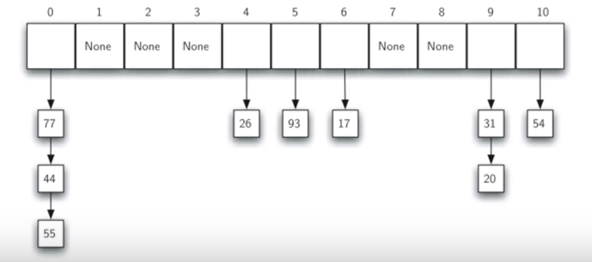

### Implementation of Hash Table

The idea of a dictionary used as a hash table to get and retrieve items using **keys** is often referred to as a **mapping**. 

In [23]:
class HashTable():
    '''
    Create a new, empty map. It returns an empty map collection.
    '''
    def __init__(self, size):
        
        # Set up size and slots and data
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def put(self, key, data):
        '''
        Add a new key-value pair to the map. 
        If the key is already in the map then replace the old value with the new value.
        '''
        
        # Get the hash value
        hashvalue = self.hashfunction(key, len(self.slots))
        
        # If Slot is Empty
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
            
        else:
            
            # If key already exists, replace old value
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data
                
            # Otherwise, find the next available slot
            else:
                nextslot = self.rehash(hashvalue, len(self.slots))
                
                # Get to the next slot
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot, len(self.slots))
                
                # Set new key, if NONE
                if self.slots[nextslot] == None:
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                
                # Otherwise replace old value
                else:
                    self.data[nextslot] = data
            
            
    def hashfunction(self, key, size):
        '''
        Remainder Method
        '''
        
        return key%size
    
    def rehash(self, oldhash, size):
        '''
        For finding next possible position
        '''
        
        return (oldhash+1)%size
    
    
    def get(self, key):
        '''
        Given a key, return the value stored in the map 
        or None otherwise.
        '''
        
        # Set up variables for our search
        startslot = self.hashfunction(key, len(self.slots))
        data = None
        
        stop = False
        found = False
        
        position = startslot
        
        # Until we discern that its not empty or found (and haven't stopped yet)
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            
            else:
                position = self.rehash(position, len(self.slots))
            
                if position == startslot:
                    stop = True
        return data
    
    
    # Special Methods for use with Python indexing
    def __getitem__(self,key):
        return self.get(key)
        
    def __setitem__(self,key, data):
        self.put(key, data)
        
    

In [24]:
h = HashTable(5)
h[1] = 'one'
h[2] = 'two'
h[3] = 'three'

In [25]:
print(h[1])

one


In [26]:
h[8] = 'eight'

In [36]:
h[8]

'eight'